<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Mini-Project_Classification/YB_3%EC%A1%B0_%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data load

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/wine/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/wine/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/wine/sample_submission.csv')

# Preprocessing

In [4]:
# type white와 red 두 종류 0,1 로 변환
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [5]:
# index 칼럼 제거
train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

# EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 558.4 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


- null 없음
- type만 object, 나머지는 모두 수치형

**train 분포**

In [ ]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.756595
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,1.000000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,1.000000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,1.000000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


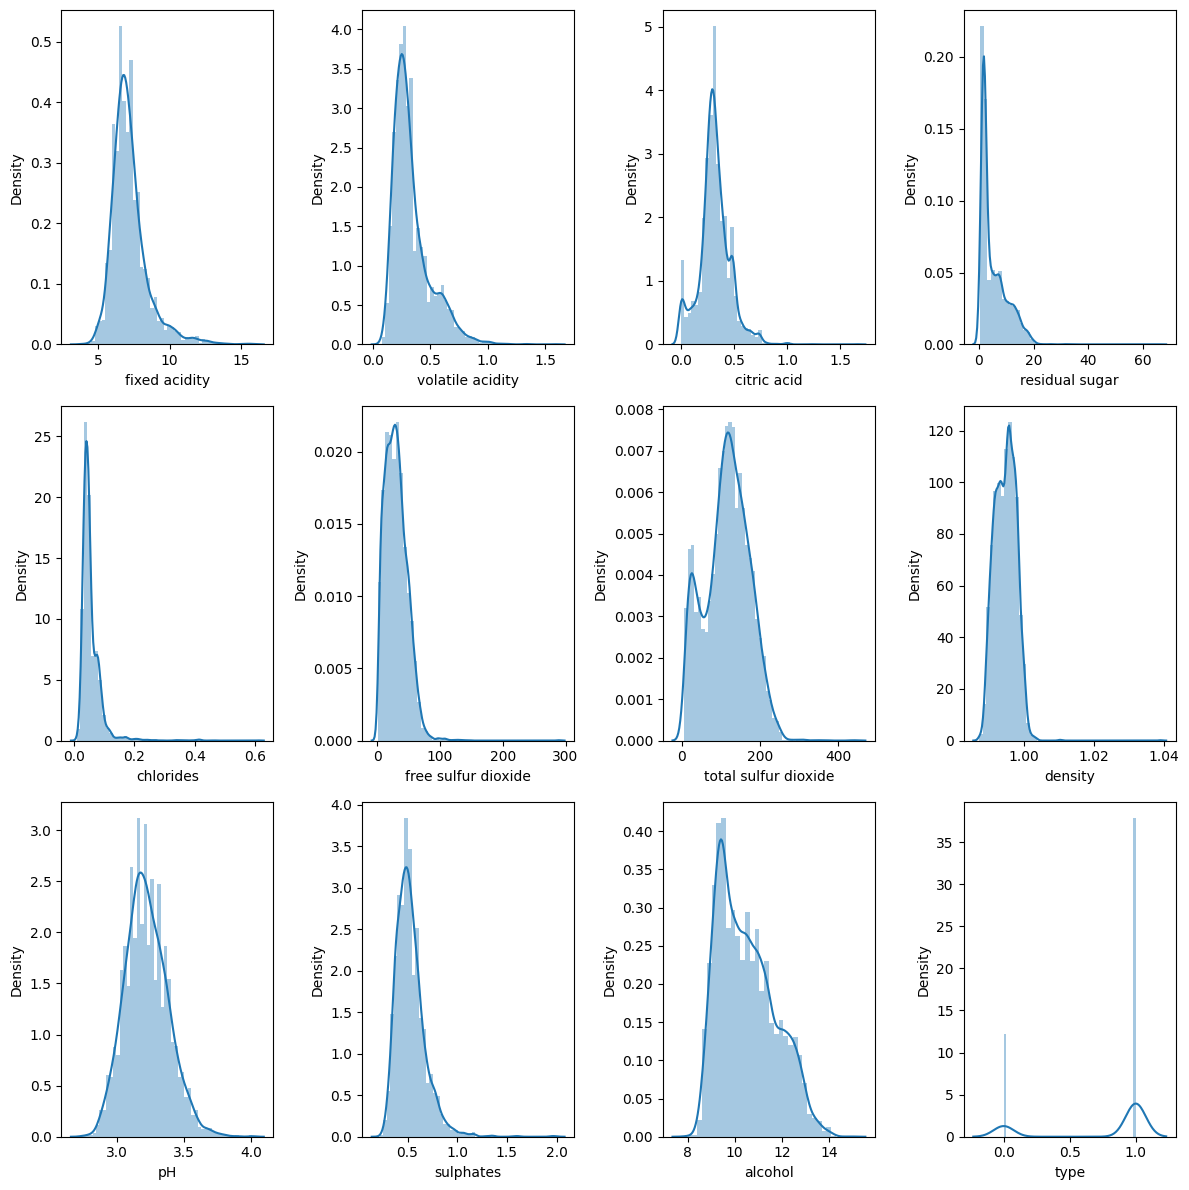

In [ ]:
plt.figure(figsize=(12,12))
for i in range(1, train.shape[1]):
  plt.subplot(3,4,i)
  sns.distplot(train.iloc[:,i])
plt.tight_layout()

**Correlation**

<Axes: >

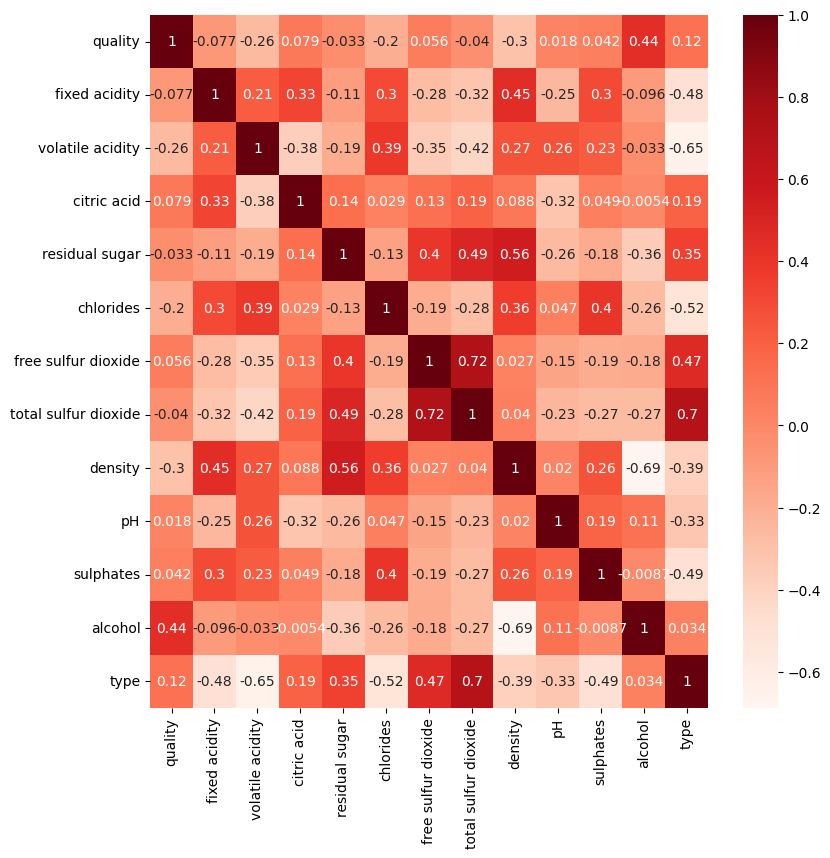

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(train.corr(), annot=True, cmap='Reds')

# LightGBM

### 김현주 (점수: 0.701)

**[전처리]**

In [ ]:
# type white와 red 두 종류 0,1 로 변환
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [ ]:
# X, y 분리
X = train.drop(['quality'], axis=1)
y = train['quality']

**[모델링]**

In [ ]:
from lightgbm import LGBMClassifier

# n_estimator=200 설정
lgbm = LGBMClassifier(n_estimators=200, verbose=-1)
lgbm.fit(X, y, eval_metric="logloss")
pred2 = lgbm.predict(test)

**[제출 파일 생성]**

In [ ]:
submission['quality']=pred2
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,5
997,997,5
998,998,6


In [ ]:
submission.to_csv('lightgbm.csv', index=False)

**[하이퍼 파라미터 튜닝]**
- **점수: 0.694**

In [ ]:
# 하이퍼 파라미터 진행한 lgb : 점수 = 0.694
params = {'max_depth':[50,100,150,200],
          'num_leaves':[32, 64, 128],
          'min_child_samples':[20,30,50,100],
          'subsample':[0.6,0.7,0.8,0.9,1.0],
          'n_estimator':[100,200,300]}

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(boost_from_average=False, verbose=-1)
gridcv = GridSearchCV(lgb, param_grid=params, cv=3)
gridcv.fit(X, y)

In [ ]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

In [ ]:
# 최적 하이퍼 파라미터로 학습/예측
lgbm = LGBMClassifier(max_depth=50, min_child_samples=20, n_estimators=100, num_leaves=128, subsample=0.6)
lgbm.fit(X, y, eval_metric="logloss")
pred = lgbm.predict(test)

**[피처 중요도 시각화]**

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

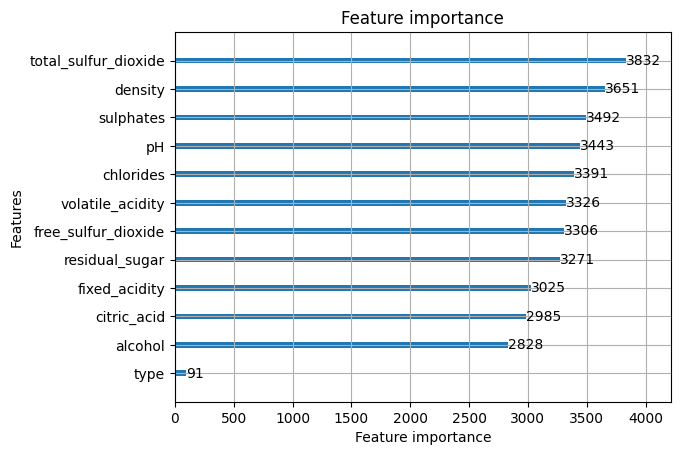

In [ ]:
from lightgbm import plot_importance
plot_importance(lgbm)

**[제출 파일 생성]**

In [ ]:
submission['quality']=pred
submission

In [ ]:
submission.to_csv('lightgbm_2.csv', index=False)

### 이형주 (점수: 0.701)

**[모델링]**

In [ ]:
#gridsearch로 최적 파라미터 찾기

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

params = {
    'n_estimators':[100, 150, 200],
    'max_depth': [120,130,140],
    'learning_rate':[0.01, 0.1, 0.15]
}

lgbm_clf=LGBMClassifier(objective='multiclass',metric='multi_logloss')


gridcv=GridSearchCV(lgbm_clf,param_grid=params,cv=3,n_jobs=-1)
gridcv.fit(X,y)
print('GridSearch 최적 파라미터',gridcv.best_params_)

In [ ]:
# GridSearch 최적 파라미터 {'learning_rate': 0.1, 'max_depth': 120, 'n_estimators': 200}
lgbm_clf = LGBMClassifier(max_depth=120,n_estimators=200,learning_rate=0.1, num_leaves=50)

lgbm_clf.fit(X, y, eval_metric='multi_logloss')
lgbm_pred = lgbm_clf.predict(test)

**[제출 파일 생성]**

In [ ]:
submission['quality'] = lgbm_pred

In [ ]:
submission.to_csv('lightgbm_3.csv', index=False)

# XGBoost

### 박지인 (점수 : 0.699)

**[전처리]**

In [ ]:
from sklearn.preprocessing import LabelEncoder

train = pd.get_dummies(train, columns=['type'], prefix=['type'])
test = pd.get_dummies(test, columns=['type'], prefix=['type'])

# boolean값들 0,1로 변환
train.iloc[:, -2:] = train.iloc[:, -2:].astype(int)
test.iloc[:, -2:] = test.iloc[:, -2:].astype(int)

In [ ]:
# X, y 분리
X = train.drop(['quality'], axis=1)
y = train['quality']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

**[모델링]**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb = XGBClassifier(n_estimators=100)

params = {'max_depth': [13, 14, 15] , 'min_child_weight': [1, 2, 3] ,'colsample_bytree': [0.5, 0.75],
          'learning_rate':[0.01,0.04,0.06],'reg_alpha':[0.01,0.03,0.05]}

gridcv = GridSearchCV(xgb, param_grid=params, scoring='accuracy', cv=3, verbose=1)
gridcv.fit(X, y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

In [ ]:
xgb = XGBClassifier(n_estimator=1000, max_depth=13, min_child_weight=1, colsample_bytree=0.5, learning_rate=0.04, reg_alpha=0.01)

xgb.fit(X, y, eval_metric='logloss')
y_pred = xgb.predict(test)
submission['quality'] = y_pred +3
submission.to_csv('xgboost_1.csv', index=False)

In [ ]:
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


**[피처 중요도 시각화]**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

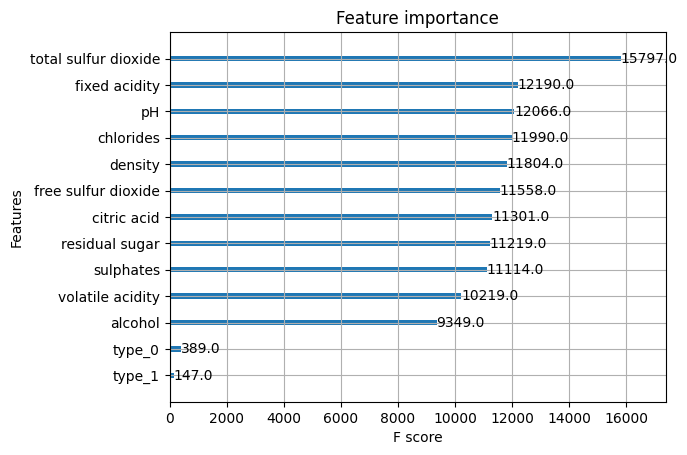

In [ ]:
from xgboost import plot_importance
xgb.fit(X, y)
plot_importance(xgb)

### 이희원 (점수: 0.684)

**[모델링]**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
xgb.fit(X, y)
xgb_pred = xgb.predict(test)

In [ ]:
submission['quality'] = xgb_pred
submission

,index,quality
0,0,2
1,1,2
2,2,2
3,3,2
4,4,3
...,...,...
995,995,3
996,996,3
997,997,2
998,998,3


no change observed for the result with log transformation

**[제출 파일 생성]**

In [ ]:
submission.to_csv('xgboost_2.csv', index=False)

# Random Forest

### 강민정(점수: 0.703)

**[전처리]**

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def my_preprocess(train_df, test_df):
  train_final = train_df.copy()
  test_final = test_df.copy()

  # Label encoding
  train_final['quality'] = le.fit_transform(train_final['quality'])
  train_final['type'] = le.fit_transform(train_final['type'])
  test_final['type'] = le.transform(test_final['type'])

  # 로그 변환
  log_list = ['chlorides', 'free sulfur dioxide', 'density', 'residual sugar']
  for i in range(len(log_list)):
    train_final[log_list[i]] = np.log1p(train_final[log_list[i]])
    test_final[log_list[i]] = np.log1p(test_final[log_list[i]])

  return train_final, test_final

In [7]:
from sklearn.model_selection import train_test_split

train_f, test_f = my_preprocess(train, test)

wine_X = train_f.drop(columns='quality')
wine_Y = train_f['quality']

X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_Y, test_size=0.2, random_state=0)

**[모델링]**

In [8]:
# 학습/예측/평가 수행 함수
from sklearn.metrics import accuracy_score

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:,1]
  accuracy = accuracy_score(y_test , pred)
  print('정확도: ', accuracy)
  return pred, pred_proba

In [9]:
# 정밀도/재현율 출력 함수
from sklearn.metrics import precision_score , recall_score , confusion_matrix
def print_recall_precision(y_true, y_predict):
  precision = precision_score(y_true, y_predict, average= "macro")
  recall = recall_score(y_true, y_predict,average= "macro")
  print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))
  print(confusion_matrix(y_true, y_predict))

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=22, n_estimators=500, random_state=919)
rf_pred, rf_proba = get_model_train_eval(rf, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, rf_pred)

정확도:  0.6972727272727273
정밀도: 0.5584, 재현율: 0.3524
[[  0   0   5   2   0   0   0]
 [  0   4  24  13   0   0   0]
 [  0   1 258  86   1   0   0]
 [  0   0  76 414  25   0   0]
 [  0   0   1  78  82   0   0]
 [  0   0   0  15   5   9   0]
 [  0   0   0   0   1   0   0]]


**[하이퍼 파라미터 튜닝]**

In [57]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[300,500],
    'max_depth' : [10,22]
}
rf = RandomForestClassifier(random_state=919)

# cv=3으로 지정
gridcv = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=3)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=919),
             param_grid={'max_depth': [10, 22], 'n_estimators': [300, 500]},
             scoring='accuracy')

In [58]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
rf_score = accuracy_score(y_test, gridcv.predict(X_test))
print('Accuracy: {0}'.format(rf_score))
print_recall_precision(y_test, gridcv.predict(X_test))

GridSearchCV 최적 파라미터: {'max_depth': 22, 'n_estimators': 500}
Accuracy: 0.6972727272727273
정밀도: 0.5584, 재현율: 0.3524
[[  0   0   5   2   0   0   0]
 [  0   4  24  13   0   0   0]
 [  0   1 258  86   1   0   0]
 [  0   0  76 414  25   0   0]
 [  0   0   1  78  82   0   0]
 [  0   0   0  15   5   9   0]
 [  0   0   0   0   1   0   0]]


In [59]:
scores_df = pd.DataFrame(gridcv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 10, 'n_estimators': 300}",0.610874,4,0.613915,0.594134,0.624573
1,"{'max_depth': 10, 'n_estimators': 500}",0.612920,3,0.616644,0.598226,0.623891
2,"{'max_depth': 22, 'n_estimators': 300}",0.629293,2,0.645293,0.611187,0.631399
3,"{'max_depth': 22, 'n_estimators': 500}",0.630658,1,0.642565,0.615280,0.634130


**[피처 중요도 시각화]**

<BarContainer object of 12 artists>

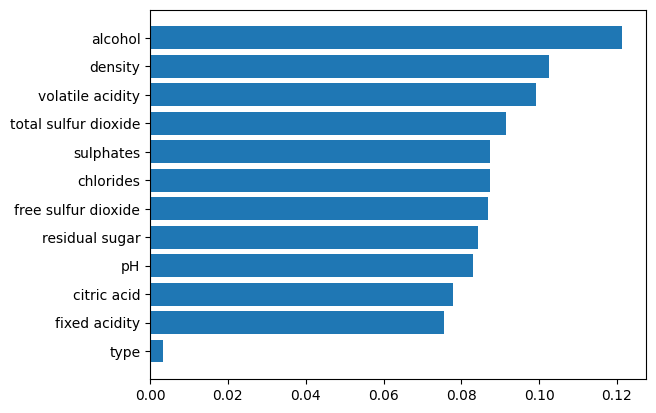

In [62]:
rf.feature_importances_
ser = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values()
plt.barh(ser.index, ser)

**[제출 파일 생성]**

In [ ]:
rf.fit(wine_X, wine_Y)

RandomForestClassifier(max_depth=22, n_estimators=500, random_state=919)

In [ ]:
le.fit(train['quality'])
submission['quality'] = le.inverse_transform(rf.predict(test_f))

In [ ]:
submission.to_csv('random_forest.csv', index=False)
submission

,index,quality
0,0,6
1,1,5
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


# Voting Classifier(점수: 0.703)
- 가장 성능이 좋았던 LightGBM(김현주), XGBoost(박지인), RandomForest(강민정) 3 모델을 이용

**[모델링]**

In [ ]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('LGBM',lgbm),('XGB',xgb),('RF',rf)], voting='soft')
vc.fit(X_train, y_train)
vc_pred, vc_proba = get_model_train_eval(vc, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, vc_pred)

정확도:  0.6881818181818182
정밀도: 0.4752, 재현율: 0.3508
[[  0   0   6   1   0   0   0]
 [  0   5  26  10   0   0   0]
 [  0   3 261  80   2   0   0]
 [  0   1  84 404  26   0   0]
 [  0   0   2  77  78   4   0]
 [  0   0   0  16   4   9   0]
 [  0   0   0   0   1   0   0]]


**[제출 파일 생성]**

In [ ]:
vc.fit(wine_X, wine_Y)

VotingClassifier(estimators=[('LGBM',
                              LGBMClassifier(n_estimators=200, verbose=-1)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importan...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('RF',
                              RandomForestClassifier(max_depth=22,
                                                     n_estimators=500,
                                                     random_state=919))],
                 voting='soft')

In [ ]:
le.fit(train['quality'])
submission['quality'] = le.inverse_transform(rf.predict(test_f))

In [ ]:
submission.to_csv('voting.csv', index=False)
submission

,index,quality
0,0,6
1,1,5
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


## Stacking (점수: 0.703)

- 4가지 모델 (xgboost, lightgbm, randomforest, soft voting)을 스태킹

In [ ]:
# Step 1
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n.iloc[train_index]
        X_te = X_train_n.iloc[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
lgb_train, lgb_test = get_stacking_base_datasets(lgb, X_train, y_train, X_test, 7)
xgb_train, xgb_test = get_stacking_base_datasets(xgb, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf, X_train, y_train, X_test, 7)
vc_train, vc_test = get_stacking_base_datasets(vc, X_train, y_train, X_test, 7)

LGBMClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
XGBClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
VotingClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [ ]:
# Step 2
Stack_final_X_train = np.concatenate((rf_train, lgb_train, xgb_train, vc_train), axis=1)
Stack_final_X_test = np.concatenate((rf_test, lgb_test, xgb_test, vc_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (4397, 12) 원본 테스트 피처 Shape: (1100, 12)
스태킹 학습 피처 데이터 Shape: (4397, 4) 스태킹 테스트 피처 데이터 Shape: (1100, 4)


In [ ]:
final = RandomForestClassifier(max_depth=30, n_estimators=350, random_state=256)
final.fit(Stack_final_X_train, y_train)
stack_final = final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))
print_recall_precision(y_test, stack_final)

최종 메타 모델의 예측 정확도: 0.7000
정밀도: 0.5444, 재현율: 0.3539
[[  0   0   6   1   0   0   0]
 [  0   4  24  13   0   0   0]
 [  0   1 263  81   1   0   0]
 [  0   0  76 412  27   0   0]
 [  0   0   1  77  82   1   0]
 [  0   0   0  16   4   9   0]
 [  0   0   0   0   1   0   0]]


In [ ]:
final.fit(wine_X, wine_Y)

RandomForestClassifier(max_depth=30, n_estimators=350, random_state=256)

In [ ]:
le.fit(train['quality'])
submission['quality'] = le.inverse_transform(final.predict(test_f))
submission

In [ ]:
submission.to_csv('stacking.csv', index=False)